In [1]:
import gmplot
import pandas as pd
import requests 
import os
import math
from xml.etree.ElementTree import fromstring, ElementTree
from datetime import datetime
import json
import statistics 
from collections import Counter
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TrafficEvents = None

chunk_size = 1000

BASE_PATH = "/home/amin/CETI/RoadConstruction/TrafficEventData/part/road_closure/"
    
index_folder = 0
index_start_point_file = 0
index_end_point_file = 411

In [3]:
def read_data(path):
    data = None
    data = pd.read_csv(path)
    return data

In [4]:
def read_part_data(folder_id, index_start, index_end):
    df = None
    print("start time is {}".format(datetime.now()))
    for i in range(index_start, index_end):
        type_of_ways_all_points = []
        path = BASE_PATH + str(folder_id) + "/" + str(i) + "_file_"+ str(i) + ".csv"

        data = read_data(path)
        df = data.append(df, ignore_index = True)
    
    print("end time is {}".format(datetime.now()))
    return df

In [5]:
df = None
for i in range(0,9):
    print(i)
    data = read_part_data(i, 0, 411)
    df = data.append(df, ignore_index = True)
    print(df.shape)
print(9)
data = read_part_data(9, 0, 393)
df = data.append(df, ignore_index = True)

0
start time is 2020-09-25 20:42:13.555848
end time is 2020-09-25 20:43:44.317614
(205500, 68)
1
start time is 2020-09-25 20:43:44.607869
end time is 2020-09-25 20:45:11.743511
(411000, 68)
2
start time is 2020-09-25 20:45:12.488825
end time is 2020-09-25 20:46:40.486875
(616500, 68)
3
start time is 2020-09-25 20:46:41.607394
end time is 2020-09-25 20:48:10.787892
(822000, 68)
4
start time is 2020-09-25 20:48:12.504744
end time is 2020-09-25 20:49:48.453164
(1027500, 68)
5
start time is 2020-09-25 20:49:50.647573
end time is 2020-09-25 20:51:25.204170
(1233000, 68)
6
start time is 2020-09-25 20:51:27.930815
end time is 2020-09-25 20:53:03.390228
(1438500, 68)
7
start time is 2020-09-25 20:53:06.637087
end time is 2020-09-25 20:54:45.831561
(1644000, 68)
8
start time is 2020-09-25 20:54:50.212754
end time is 2020-09-25 20:56:30.434320
(1849500, 68)
9
start time is 2020-09-25 20:56:35.032459
end time is 2020-09-25 20:58:07.340875


In [6]:
df.head(10)

,Id,Source,Type,EventCode,Severity,StartPoint_Lat,StartPoint_Lng,EndPoint_Lat,EndPoint_Lng,Distance(mi),...,nearst_nodes_of_start_point,nearst_nodes_of_end_point,nearst_nodes_ids_of_start_point,nearst_nodes_ids_of_end_point,type_of_roads,avg_speed,distance,eta,road_closure,lane_closure
0,M-29450881,MapQuest,Construction,406.0,3,44.309494,-90.840271,NaN,NaN,0.86,...,"{'waypoints': [{'nodes': [2147408021, 47184371...","{'waypoints': [{'nodes': [2147408021, 47184371...","[2147408021, 471843710, 2147408024, 2147408021...","[2147408021, 471843710, 2147408024, 2147408021...",motorway_link,-100.0,-100.0,-100.0,False,False
1,M-29450890,MapQuest,Construction,703.0,2,44.387669,-88.720055,NaN,NaN,0.12,...,"{'waypoints': [{'nodes': [232006634, 232006479...","{'waypoints': [{'nodes': [232006634, 232006479...","[232006634, 232006479, 2281677742, 232006634, ...","[232006634, 232006479, 2281677742, 232006634, ...",trunk,-100.0,-100.0,-100.0,False,False
2,M-29450891,MapQuest,Construction,703.0,2,44.403862,-88.734856,NaN,NaN,0.00,...,"{'waypoints': [{'nodes': [232006387, 232006382...","{'waypoints': [{'nodes': [232006387, 232006382...","[232006387, 232006382, 232006382, 231764181, 2...","[232006387, 232006382, 232006382, 231764181, 2...",trunk,-100.0,-100.0,-100.0,False,False
3,M-29450947,MapQuest,Construction,735.0,3,44.734169,-90.497337,NaN,NaN,0.10,...,"{'waypoints': [{'nodes': [147039746, 147017038...","{'waypoints': [{'nodes': [147039746, 147017038...","[147039746, 147017038, 147017038, 147017035, 1...","[147039746, 147017038, 147017038, 147017035, 1...",residential,-100.0,-100.0,-100.0,True,False
4,M-29450948,MapQuest,Construction,735.0,3,44.734177,-90.496017,NaN,NaN,0.10,...,"{'waypoints': [{'nodes': [3372527386, 14701703...","{'waypoints': [{'nodes': [3372527386, 14701703...","[3372527386, 147017032, 3372527390, 147017032,...","[3372527386, 147017032, 3372527390, 147017032,...",primary,-100.0,-100.0,-100.0,True,False
5,M-29452018,MapQuest,Construction,641.0,2,43.074471,-88.066605,NaN,NaN,0.00,...,"{'waypoints': [{'nodes': [0, 196651378], 'hint...","{'waypoints': [{'nodes': [0, 196651378], 'hint...","[0, 196651378, 0, 233349076, 0, 196651380, 0, ...","[0, 196651378, 0, 233349076, 0, 196651380, 0, ...",None,-100.0,-100.0,-100.0,False,True
6,M-29452119,MapQuest,Construction,701.0,2,42.353142,-87.977654,NaN,NaN,0.00,...,"{'waypoints': [{'nodes': [235603291, 235603296...","{'waypoints': [{'nodes': [235603291, 235603296...","[235603291, 235603296, 235603291, 235587571, 7...","[235603291, 235603296, 235603291, 235587571, 7...",secondary,-100.0,-100.0,-100.0,False,True
7,M-29452120,MapQuest,Construction,701.0,2,42.385311,-87.963326,NaN,NaN,0.00,...,"{'waypoints': [{'nodes': [1514677298, 23544272...","{'waypoints': [{'nodes': [1514677298, 23544272...","[1514677298, 235442729, 0, 1514677298, 1514677...","[1514677298, 235442729, 0, 1514677298, 1514677...",primary,-100.0,-100.0,-100.0,False,True
8,M-29452121,MapQuest,Construction,500.0,2,42.346806,-87.902145,NaN,NaN,0.00,...,"{'waypoints': [{'nodes': [235210040, 181946597...","{'waypoints': [{'nodes': [235210040, 181946597...","[235210040, 1819465977, 726669678, 726669806, ...","[235210040, 1819465977, 726669678, 726669806, ...",trunk_link,-100.0,-100.0,-100.0,False,True
9,M-29452122,MapQuest,Construction,701.0,2,42.716621,-88.225945,NaN,NaN,0.00,...,"{'waypoints': [{'nodes': [992846309, 473621036...","{'waypoints': [{'nodes': [992846309, 473621036...","[992846309, 4736210361, 1073297157, 1102350902...","[992846309, 4736210361, 1073297157, 1102350902...",trunk,-100.0,-100.0,-100.0,False,True


In [7]:
df.shape

(2046000, 68)

In [8]:
df_city_state_close_group = df.groupby(["City", "State", "road_closure", "lane_closure"])

In [9]:
df_city_state_close_group_count = df_city_state_close_group.size().reset_index(name='counts')

In [10]:
df_city_state_close_group_count.head()

,City,State,road_closure,lane_closure,counts
0,Aaronsburg,PA,False,False,4
1,Aaronsburg,PA,False,True,2
2,Abbeville,AL,False,False,1
3,Abbeville,AL,False,True,6
4,Abbeville,GA,False,True,4


In [11]:
df_state_close_group = df.groupby(["State", "road_closure", "lane_closure"])

In [12]:
df_state_close_group_count = df_state_close_group.size().reset_index(name='counts')

In [13]:
df_state_close_group_count.head()

,State,road_closure,lane_closure,counts
0,AL,False,False,3491
1,AL,False,True,3157
2,AL,True,False,2274
3,AR,False,False,1100
4,AR,False,True,1187


In [14]:
df_state_close_group_count_no_lock_road = df_state_close_group_count[df_state_close_group_count.road_closure == False]

In [15]:
df_state_close_group_count_no_lock_road.head()

,State,road_closure,lane_closure,counts
0,AL,False,False,3491
1,AL,False,True,3157
3,AR,False,False,1100
4,AR,False,True,1187
6,AZ,False,False,16671


In [16]:
df_state_close_group_count_no_lock_road_no_lane = df_state_close_group_count_no_lock_road[df_state_close_group_count_no_lock_road.lane_closure == False]

In [17]:
df_state_close_group_count_no_lock_road_no_lane.head()

,State,road_closure,lane_closure,counts
0,AL,False,False,3491
3,AR,False,False,1100
6,AZ,False,False,16671
9,CA,False,False,150555
12,CO,False,False,76787


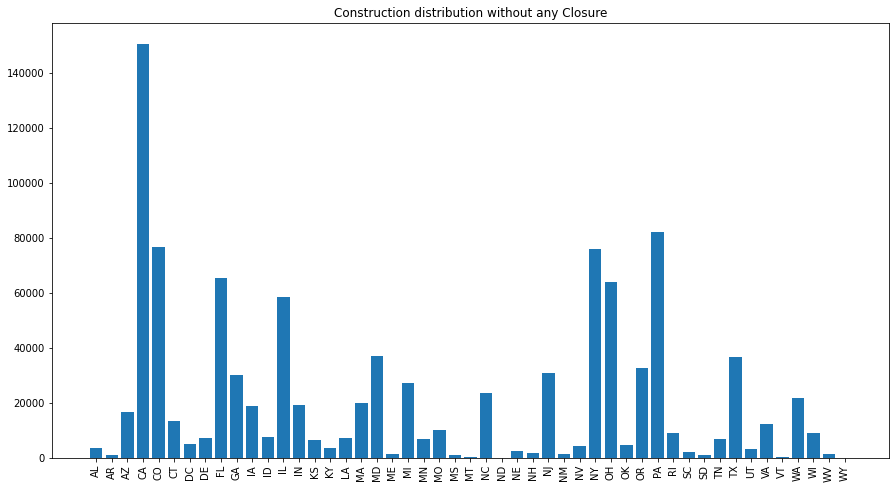

In [18]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_close_group_count_no_lock_road_no_lane['State'], height=df_state_close_group_count_no_lock_road_no_lane['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution without any Closure")
plt.savefig("Construction-distribution-without-any-Closure.png")

In [19]:
df_state_close_group_count_no_lock_road_with_lane = df_state_close_group_count_no_lock_road[df_state_close_group_count_no_lock_road.lane_closure == True]

In [20]:
df_state_close_group_count_no_lock_road_with_lane.head()

,State,road_closure,lane_closure,counts
1,AL,False,True,3157
4,AR,False,True,1187
7,AZ,False,True,5747
10,CA,False,True,72688
13,CO,False,True,20340


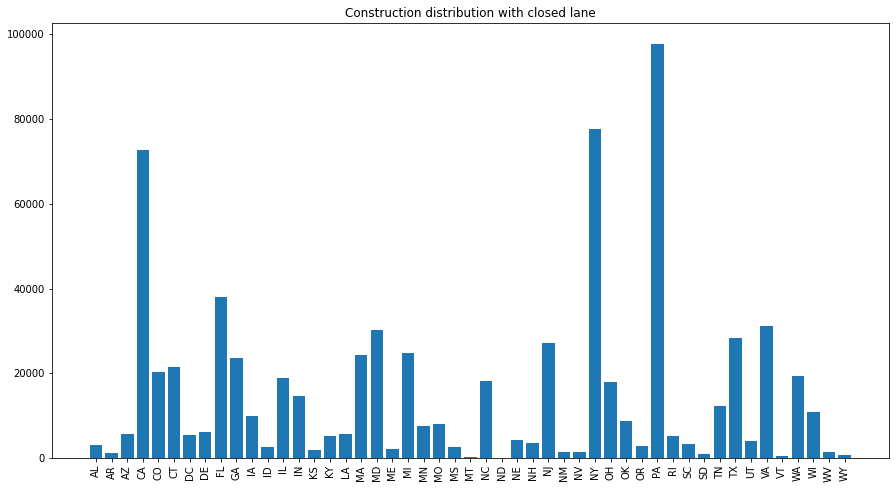

In [21]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_close_group_count_no_lock_road_with_lane['State'], height=df_state_close_group_count_no_lock_road_with_lane['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution with closed lane")
plt.savefig("Construction-distribution-with-closed-lane.png")

In [22]:
df_state_close_group_count_with_lock_road = df_state_close_group_count[df_state_close_group_count.road_closure == True]

In [23]:
df_state_close_group_count_with_lock_road.head()

,State,road_closure,lane_closure,counts
2,AL,True,False,2274
5,AR,True,False,265
8,AZ,True,False,6178
11,CA,True,False,34223
14,CO,True,False,7700


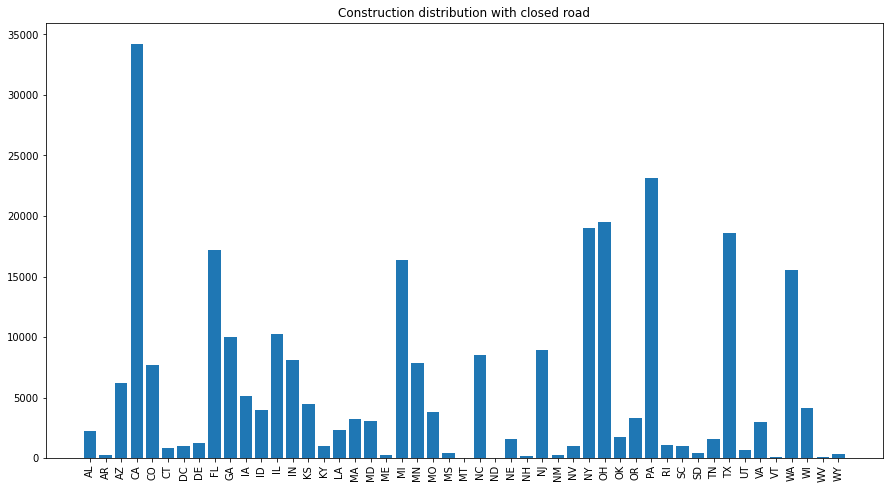

In [24]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_close_group_count_with_lock_road['State'], height=df_state_close_group_count_with_lock_road['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution with closed road")
plt.savefig("Construction-distribution-with-closed-road.png")

In [25]:
df_state_group = df.groupby(["State"])

In [26]:
df_state_group_count = df_state_group.size().reset_index(name='counts')

In [27]:
df_state_group_count.head()

,State,counts
0,AL,8922
1,AR,2552
2,AZ,28596
3,CA,257466
4,CO,104827


In [28]:
df_state_group_count['ST'] = df_state_group_count["State"]
df_state_group_count['totalCounts'] = df_state_group_count["counts"]
df_state_group_count = df_state_group_count.drop("counts", axis = 1)

In [29]:
df_state_group_count.head()

,State,ST,totalCounts
0,AL,AL,8922
1,AR,AR,2552
2,AZ,AZ,28596
3,CA,CA,257466
4,CO,CO,104827


In [30]:
df_state_close_group_count_no_lock_road_no_lane_Join = df_state_group_count.set_index('State').join(df_state_close_group_count_no_lock_road_no_lane.set_index('State'))

In [31]:
df_state_close_group_count_no_lock_road_no_lane_Join.head()

,ST,totalCounts,road_closure,lane_closure,counts
State,,,,,
AL,AL,8922,False,False,3491
AR,AR,2552,False,False,1100
AZ,AZ,28596,False,False,16671
CA,CA,257466,False,False,150555
CO,CO,104827,False,False,76787


In [32]:
df_state_close_group_count_no_lock_road_no_lane_Join["rate"] = df_state_close_group_count_no_lock_road_no_lane_Join["counts"] / df_state_close_group_count_no_lock_road_no_lane_Join["totalCounts"]

In [33]:
df_state_close_group_count_no_lock_road_no_lane_Join.head()

,ST,totalCounts,road_closure,lane_closure,counts,rate
State,,,,,,
AL,AL,8922,False,False,3491,0.391280
AR,AR,2552,False,False,1100,0.431034
AZ,AZ,28596,False,False,16671,0.582984
CA,CA,257466,False,False,150555,0.584757
CO,CO,104827,False,False,76787,0.732512


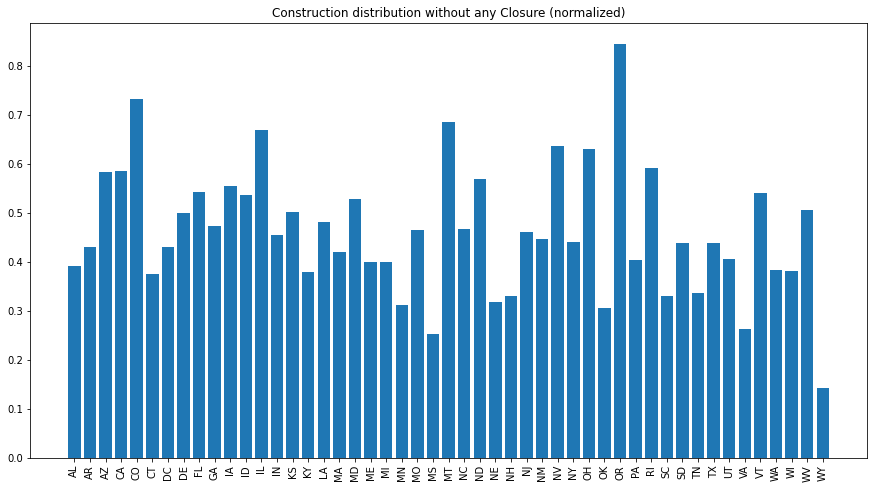

In [34]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_close_group_count_no_lock_road_no_lane_Join['ST'], height=df_state_close_group_count_no_lock_road_no_lane_Join['rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution without any Closure (normalized)")
plt.savefig("Construction-distribution-without-any-Closure-normalized.png")

In [35]:
df_state_group_count.head()

,State,ST,totalCounts
0,AL,AL,8922
1,AR,AR,2552
2,AZ,AZ,28596
3,CA,CA,257466
4,CO,CO,104827


In [36]:
df_state_close_group_count_no_lock_road_with_lane.head()

,State,road_closure,lane_closure,counts
1,AL,False,True,3157
4,AR,False,True,1187
7,AZ,False,True,5747
10,CA,False,True,72688
13,CO,False,True,20340


In [37]:
df_state_close_group_count_no_lock_road_with_lane_Join = df_state_group_count.set_index('State').join(df_state_close_group_count_no_lock_road_with_lane.set_index('State'))

In [38]:
df_state_close_group_count_no_lock_road_with_lane_Join.head()

,ST,totalCounts,road_closure,lane_closure,counts
State,,,,,
AL,AL,8922,False,True,3157
AR,AR,2552,False,True,1187
AZ,AZ,28596,False,True,5747
CA,CA,257466,False,True,72688
CO,CO,104827,False,True,20340


In [39]:
df_state_close_group_count_no_lock_road_with_lane_Join["rate"] = df_state_close_group_count_no_lock_road_with_lane_Join["counts"] / df_state_close_group_count_no_lock_road_with_lane_Join["totalCounts"]

In [40]:
df_state_close_group_count_no_lock_road_with_lane_Join.head()

,ST,totalCounts,road_closure,lane_closure,counts,rate
State,,,,,,
AL,AL,8922,False,True,3157,0.353844
AR,AR,2552,False,True,1187,0.465125
AZ,AZ,28596,False,True,5747,0.200972
CA,CA,257466,False,True,72688,0.282321
CO,CO,104827,False,True,20340,0.194034


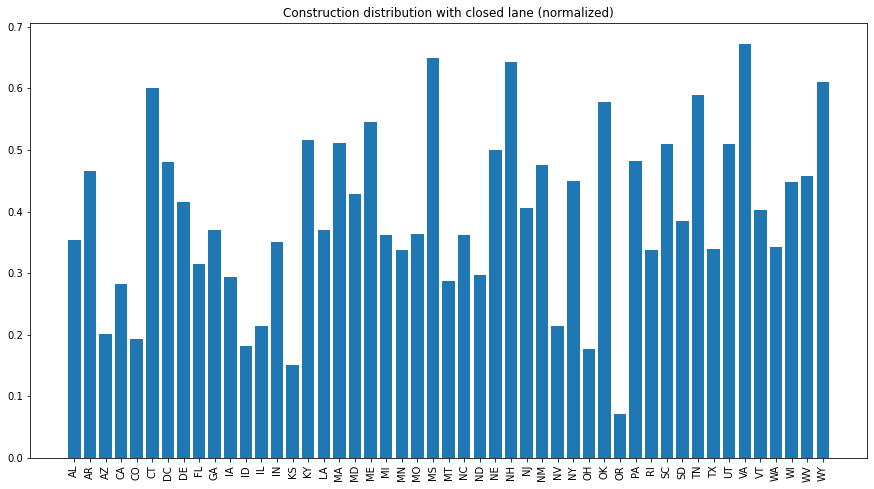

In [42]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_close_group_count_no_lock_road_with_lane_Join['ST'], height=df_state_close_group_count_no_lock_road_with_lane_Join['rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution with closed lane (normalized)")
plt.savefig("Construction-distribution-with-closed-lane-normalized.png")

In [43]:
df_state_close_group_count_with_lock_road.head()

,State,road_closure,lane_closure,counts
2,AL,True,False,2274
5,AR,True,False,265
8,AZ,True,False,6178
11,CA,True,False,34223
14,CO,True,False,7700


In [44]:
df_state_group_count.head()

,State,ST,totalCounts
0,AL,AL,8922
1,AR,AR,2552
2,AZ,AZ,28596
3,CA,CA,257466
4,CO,CO,104827


In [45]:
df_state_close_group_count_with_lock_road_Join = df_state_group_count.set_index('State').join(df_state_close_group_count_with_lock_road.set_index('State'))

In [46]:
df_state_close_group_count_with_lock_road_Join.head()

,ST,totalCounts,road_closure,lane_closure,counts
State,,,,,
AL,AL,8922,True,False,2274
AR,AR,2552,True,False,265
AZ,AZ,28596,True,False,6178
CA,CA,257466,True,False,34223
CO,CO,104827,True,False,7700


In [47]:
df_state_close_group_count_with_lock_road_Join["rate"] = df_state_close_group_count_with_lock_road_Join["counts"] / df_state_close_group_count_with_lock_road_Join["totalCounts"]

In [48]:
df_state_close_group_count_with_lock_road_Join.head()

,ST,totalCounts,road_closure,lane_closure,counts,rate
State,,,,,,
AL,AL,8922,True,False,2274,0.254876
AR,AR,2552,True,False,265,0.103840
AZ,AZ,28596,True,False,6178,0.216044
CA,CA,257466,True,False,34223,0.132922
CO,CO,104827,True,False,7700,0.073454


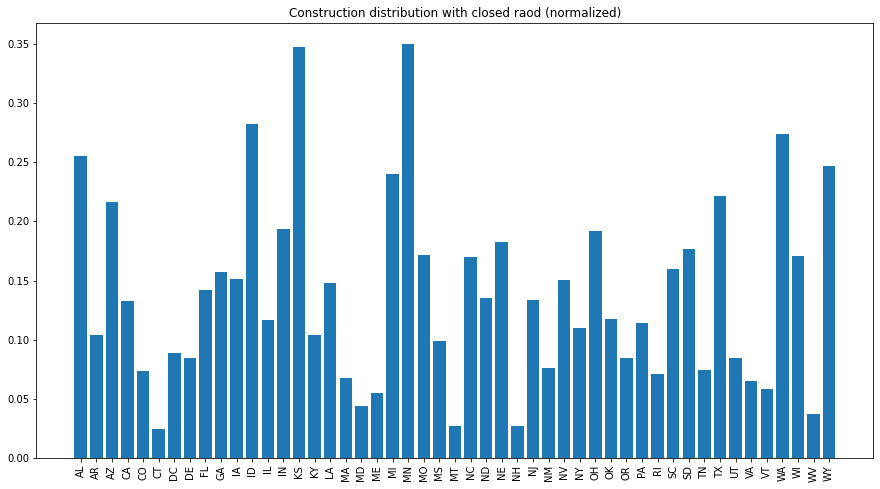

In [49]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_close_group_count_with_lock_road_Join['ST'], height=df_state_close_group_count_with_lock_road_Join['rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution with closed raod (normalized)")
plt.savefig("Construction-distribution-with-closed-raod-normalized.png")